## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

    1. Which variables are significant in predicting the price of a house, and

    2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Reading & Understanding Data

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Importing train.csv
df_train = pd.read_csv('train.csv')

In [3]:
# Check the head of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Inspecting the various aspects of the df_train dataframe**

In [4]:
df_train.shape

(1460, 81)

In [5]:
# Printing all the columns of the dataframe
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [6]:
print('{} Numerical columns, {} Categorical columns are part of the original dataset.'.format(
    list(df_train.select_dtypes(include = [np.number]).shape)[1], 
    list(df_train.select_dtypes(include = ['object']).shape)[1]))                                                                        

38 Numerical columns, 43 Categorical columns are part of the original dataset.


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Checking for any duplicates in the DataFrame
df_train.loc[df_train.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 2. Cleaning the Data

**2.1. Dropping Variables not needed**

- Dropping Id column as it's an unique identifier in the Dataset and hence won't help with the analysis

In [10]:
df_train = df_train.drop('Id', axis = 1)

**2.2. Checking for Missing Values and Treating them**

- Need to check if there is any missing data in the dataset.

In [11]:
# Finding all the missing data and summing them based on each column and sorting it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of missing data by dividing the number of missing values with total and sorting it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's 
df_train_missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


- Let's visualize the above as well

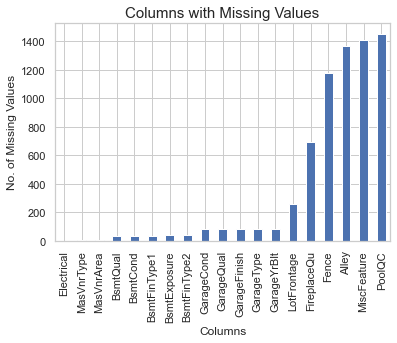

In [12]:
# Setting a grid for the pot
sns.set_style('whitegrid')
# Finding the no. of missing values
missing = df_train.isnull().sum()
# Filtering the columns with just missing values
missing = missing[missing > 0]
# Sorting the values
missing.sort_values(inplace = True)
# Plotting the bar chart
missing.plot.bar()
# Setting the title of the plot
plt.title('Columns with Missing Values', fontsize = 15)
# Setting the x label
plt.xlabel('Columns')
# Setting the y label
plt.ylabel('No. of Missing Values')
plt.show()

**Inference:**
   - First thing to do is get rid of the features with more than 90% missing values. For example the PoolQC's missing values are probably due to the lack of pools in some buildings, which is very logical. But replacing those (more than 90%) missing values with 'no pool' will leave us with a feature with low variance, and low variance features are uninformative for machine learning models. So we drop the features with more than 80% missing values.

In [13]:
# Removing any column which has more than 90% null values
df_train = df_train.loc[:, df_train.isnull().sum()/df_train.shape[0] * 100 < 80]
# Printing the df
print(df_train.shape)

(1460, 76)


In [14]:
# Finding all the missing data and summing them based on each column and sorting it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by dividing the number of missing values with total and sorting it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's 
df_train_missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(16)

,Total,Percent
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247


In [15]:
NA = df_train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'BsmtFinType2', 'BsmtExposure',
              'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'MasVnrArea', 'Electrical', 'FireplaceQu', 'LotFrontage']]

In [16]:
NAcat = NA.select_dtypes(include = 'object')
NAnum = NA.select_dtypes(exclude = 'object')
print('We have: ', NAcat.shape[1], 'categorical features with missing values')
print('We have: ', NAnum.shape[1], 'numerical features with missing values')

We have:  12 categorical features with missing values
We have:  3 numerical features with missing values


- Now, upon further checking the data, we can see that there are columns having null values but as per the data description these are not values which were not capured. These basically mean that those features were not available as part of the property. Hence we will have to impute them appropriately.
    - We have decided to impute such columns with a value of `NO`.

In [17]:
# Columns where NA values have meaning eg. no garage etc.
cols_fillna = ['MasVnrType', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure',
              'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtFinType2']
# Replace 'NA' with 'No' in these columns
for col in cols_fillna:
    df_train[col].fillna('No', inplace = True)

In [18]:
# Finding all the missing data and summing them based on each column and sorting it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by dividing the number of missing values with total and sorting it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's 
df_train_missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(5)

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
BedroomAbvGr,0,0.000000


- Now that we have imputed the NA columns with thw value of `No`, we are still left with columns which have a high percentage of null values.
- Let's check these individually and see how to treat such columns.

**2.2.1 LotFrontage column check**

In [19]:
# Checking the count of different values within the column
df_train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

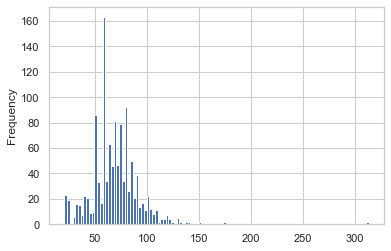

In [20]:
# Pulling the length of number of unique values in the column
num_unique_values = len(df_train['LotFrontage'].unique())
# Plotting a hisogram for visualizing the data
df_train['LotFrontage'].plot.hist(bins = num_unique_values)
plt.show()

- Now we have decided to impute the values of either the mean/median or mode with the null values. Hence, let's check what these 3 metrics provide us.

In [21]:
# Checking the mean of the column
print('Mean is: ', df_train['LotFrontage'].mean())
# Checking mode of the column
print('Mode is: ', df_train['LotFrontage'].mode())
# Checking mode of the column
print('Median is: ', df_train['LotFrontage'].median())

Mean is:  70.04995836802665
Mode is:  0    60.0
dtype: float64
Median is:  69.0


**Inference:**
    
   - As all 3 metrics are comparable. But since we want missing value to be imputed with an integer, taking median i.e. 69

In [22]:
# Imputing the value of median to the null values
df_train.loc[pd.isnull(df_train['LotFrontage']),['LotFrontage']] = 69

**Let's Check the Distribution now**

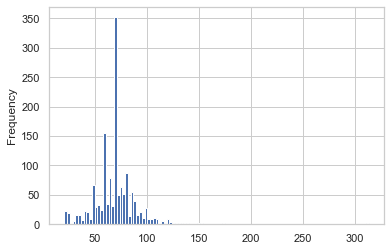

In [23]:
# Pulling the length of number of unique values in the column
num_unique_values = len(df_train['LotFrontage'].unique())
# Plotting a histogram for visualizing the data
df_train['LotFrontage'].plot.hist(bins = num_unique_values)
plt.show()

**Inference:**
   - Since the distribution has not changed much before and after the null value imputation, we should be good here.

**2.2.2 GarageYrBlt Column Check**

In [24]:
# Checking the count of different values within the column
df_train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

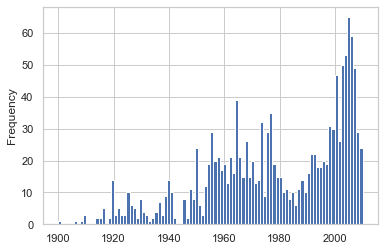

In [25]:
# Pulling the length of number of unique values in the column
num_unique_values = len(df_train['GarageYrBlt'].unique())
# Plotting a hisogram for visualizing the data
df_train['GarageYrBlt'].plot.hist(bins = num_unique_values)
plt.show()

In [26]:
# Checking the mean of the column
print('Mean is: ', df_train['GarageYrBlt'].mean())
# Checking mode of the column
print('Mode is: ', df_train['GarageYrBlt'].mode())
# Checking mode of the column
print('Median is: ', df_train['GarageYrBlt'].median())

Mean is:  1978.5061638868744
Mode is:  0    2005.0
dtype: float64
Median is:  1980.0


**Inference:**
   - Since the column tells about in what year the garage was built, we cannot apply the mean or the median here. Hence we will impute the values with mode here.

In [27]:
# Imputing the value of mode to the null values
df_train.loc[pd.isnull(df_train['GarageYrBlt']),['GarageYrBlt']] = 2005

**Let's Check the Distribution Now**

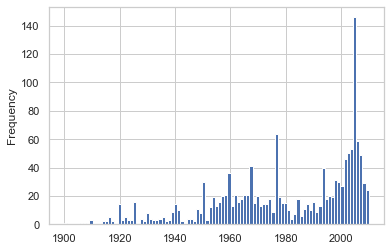

In [28]:
# Pulling the length of number of unique values in the column
num_unique_values = len(df_train['GarageYrBlt'].unique())
# Plotting a histogram for visualizing the data
df_train['GarageYrBlt'].plot.hist(bins = num_unique_values)
plt.show()

**Inference:**
   - Since the distribution has not changed much before and after null value imputation, we should be good here.

In [29]:
# Finding all the missing data and summing them based on each column and sorting it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by dividing the number of missing values with total and sorting it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's 
df_train_missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(5)

,Total,Percent
MasVnrArea,8,0.547945
Electrical,1,0.068493
BedroomAbvGr,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000


**2.2.3. MasVnrArea Column Check**

In [30]:
# Checking the count of different values within the column
df_train['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [31]:
# Checking the mean of the column
print('Mean is: ', df_train['MasVnrArea'].mean())
# Checking mode of the column
print('Mode is: ', df_train['MasVnrArea'].mode())
# Checking mode of the column
print('Median is: ', df_train['MasVnrArea'].median())

Mean is:  103.68526170798899
Mode is:  0    0.0
dtype: float64
Median is:  0.0


**Inference:**
   - Since the mode and median are the same, and majority of the values are 0, we will impute the missing values as 0

In [32]:
# Imputing the value of median to the null values
df_train.loc[pd.isnull(df_train['MasVnrArea']),['MasVnrArea']] = 0

**2.2.4. Electrical Column Check**

In [33]:
# Check the count of different values within the column
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- Since the majority is SBrkr, we will impute it with the same.

In [34]:
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

In [35]:
# Finding all the missing data and summing them based on each column and sorting it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by dividing the number of missing values with total and sorting it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's 
df_train_missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data[df_train_missing_data.sum(axis = 1)>0]

,Total,Percent


**2.3. Outlier Analysis**

There are 2 types of outliers and we will treat the outliers since they can skew our dataset.
- Statistical
- Domain Specific

Let's plot a boxplot to check the outliers

In [36]:
# Before we move forward, lets create a copy of existing DataFrame
df_train1 = df_train.copy()

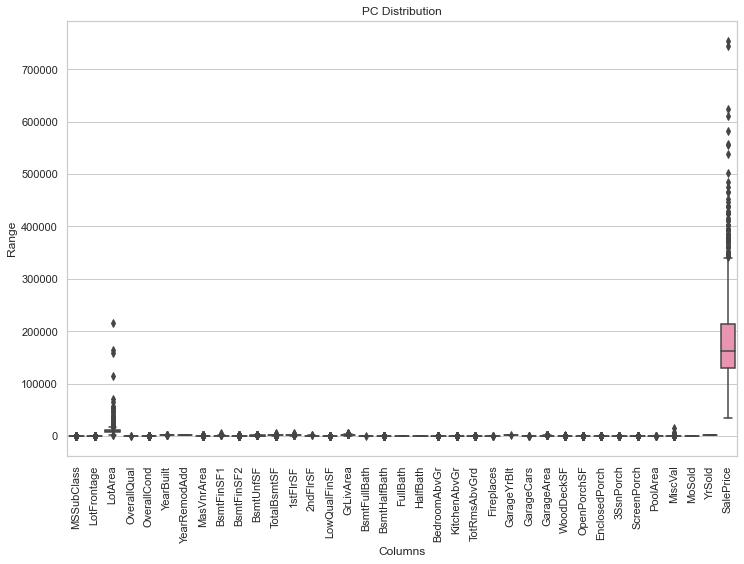

In [37]:
# Initializing the figure
fig = plt.figure(figsize = (12,8))
# Printing the boxpolot
sns.boxplot(data = df_train1)
# Setting the title of the figure
plt.title('PC Distribution', fontsize = 12)
# Setting the y label
plt.ylabel('Range')
# Setting the x label
plt.xlabel('Columns')
plt.xticks(rotation = 90)

# Printing the plot
plt.show()

In [38]:
df_train1.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,20.000000,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,183

As we can see from the graph and table above, there are some outliers in the dataset. Let's treat these outliers. We will keep the lower quantile at 0.05 and upper qualtile as 0.95.

In [39]:
# Finding the columns on which the outlier treatment will be performed
AllCols = df_train1.select_dtypes(exclude = 'object')
# Sorting the columns
AllCols = AllCols[sorted(AllCols.columns)]
# Printing the columns
print(AllCols.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')


In [40]:
# Running a for loop to remove the putliers from each column
for i in AllCols.columns:
    # Setting the lower whisker
    Q1 = df_train[i].quantile(0.05)
    # Setting the upper whisker
    Q3 = df_train[i].quantile(0.95)
    # Setting the IQR by dividing the upper with lower quantile
    IQR = Q3 - Q1
    # Performing the outlier analysis
    df_train = df_train[(df_train[i] >= Q1 - 1.5 * IQR) & (df_train[i] <= Q3 + 1.5 * IQR)]

In [41]:
# Checking the shape of the DataFrame now
df_train.shape

(1266, 76)

In [42]:
df_train.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.0,1266.0,1266.000000,1266.000000,1266.000000
mean,54.522117,69.081359,9640.176935,6.155608,5.567930,1973.480253,1985.822275,103.954186,441.757504,40.281201,574.886256,1056.924961,1143.785150,336.422591,0.0,1480.207741,0.420221,0.053712,1.541074,0.393365,2.815956,1.0,6.392575,0.615324,1980.520537,1.783570,475.955766,93.585308,45.843602,21.109795,0.0,14.796998,0.0,0.0,6.293049,2007.804107,181610.662717
std,40.663333,19.976837,4133.746732,1.364816,1.082618,29.436365,20.624538,173.174685,428.430328,137.986440,439.848270,397.931851,367.996322,424.218030,0.0,481.124117,0.500152,0.229017,0.538160,0.496712,0.739681,0.0,1.508314,0.629739,24.664643,0.730314,208.283388,120.249869,60.675897,59.192870,0.0,53.234175,0.0,0.0,2.694788,1.322179,75827.202320
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,35311.000000
5%,20.000000,35.000000,3182.000000,4.000000,4.000000,1920.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,546.000000,672.000000,0.000000,0.0,845.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,4.000000,0.000000,1930.250000,1.000000,180.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,2006.000000,89478.250000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,242.500000,799.250000,864.250000,0.000000,0.0,1114.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1963.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,131000.000000
50%,50.000000,69.000000,9356.500000,6.000000,5.000000,1976.000000,1995.000000,0.000000,387.500000,0.000000,483.500000,990.000000,1072.000000,0.000000,0.0,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1986.000000,2.000000,478.000000,0.000000,27.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,165000.000000
75%,60.000000,78.750000,11433.250000,7.000000,6.000000,2002.000000,2004.000000,168.750000,719.000000,0.000000,808.000000,1276.750000,1362.000000,720.000000,0.0,1737.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2004.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,215000.000000
90%,120.000000,91.500000,14003.000000,8.000000,7.000000,2006.000000,2007.000000,328.000000,1056.000000,93.000000,1238.500000,1580.000000,1656.000000,911.000000,0.0,2103.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.0,8.000000,1.000000,2006.000000,3.000000,756.500000,253.000000,128.000000,112.000000,0.0,0.000000,0.0,0.0,10.000000,2010.000000,280000.000000
95%,160.000000,102.750000,16186.500000,8.000000,8.000000,2007.000000,2007.750000,450.750000,1255.750000,374.000000,1468.000000,1740.000000,1809.000000,1119.750000,0.0,2396.500000,1.000000,1.000000,2.000000,1.000000,4.000000,1.0,9.000000,2.000000,2007.000000,3.000000,851.500000,321.500000,169.000000,176.000000,0.0,160.000000,0.0,0.0,11.000000,2010.000000,325906.000000


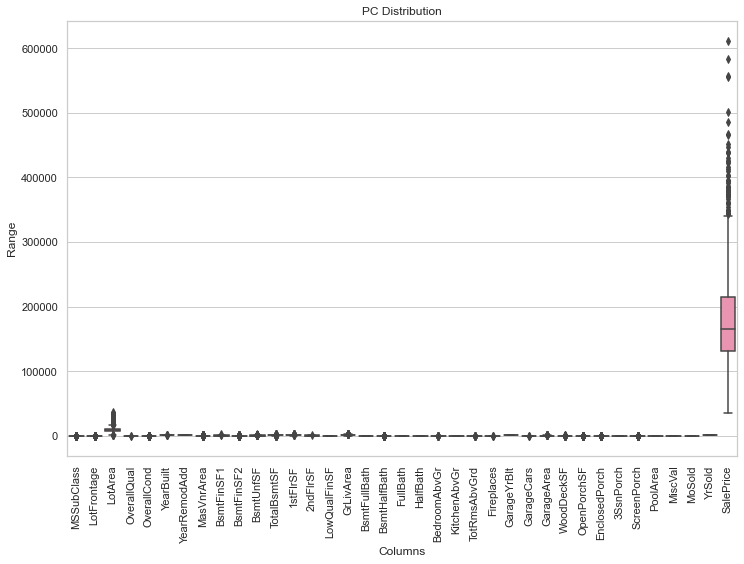

In [43]:
# Initializing the figure
fig = plt.figure(figsize = (12,8))
# Printing the boxpolot
sns.boxplot(data = df_train)
# Setting the title of the figure
plt.title('PC Distribution', fontsize = 12)
# Setting the y label
plt.ylabel('Range')
# Setting the x label
plt.xlabel('Columns')
plt.xticks(rotation = 90)

# Printing the plot
plt.show()

In [44]:
# Let's take a look at the Scarifice
print('Shape before outlier treatment: ', df_train1.shape)
print('Shape after outlier treatment: ', df_train.shape)

print('Percentage data removal is around {}%'.format(round(100*(df_train1.shape[0] - df_train.shape[0])/df_train1.shape[0]), 2))

Shape before outlier treatment:  (1460, 76)
Shape after outlier treatment:  (1266, 76)
Percentage data removal is around 13%


## 3. Visualising the Data using EDA

- Here's where we'll identify if some predictors directly have a strong association with the outcome variable i.e `Sales Price`.
- We'll visualize our data using `Matplotlib` & `Seaborn`.

**3.1. Univariate Analysis**

**3.1.1. Plotting the price of all the houses in the dataset**

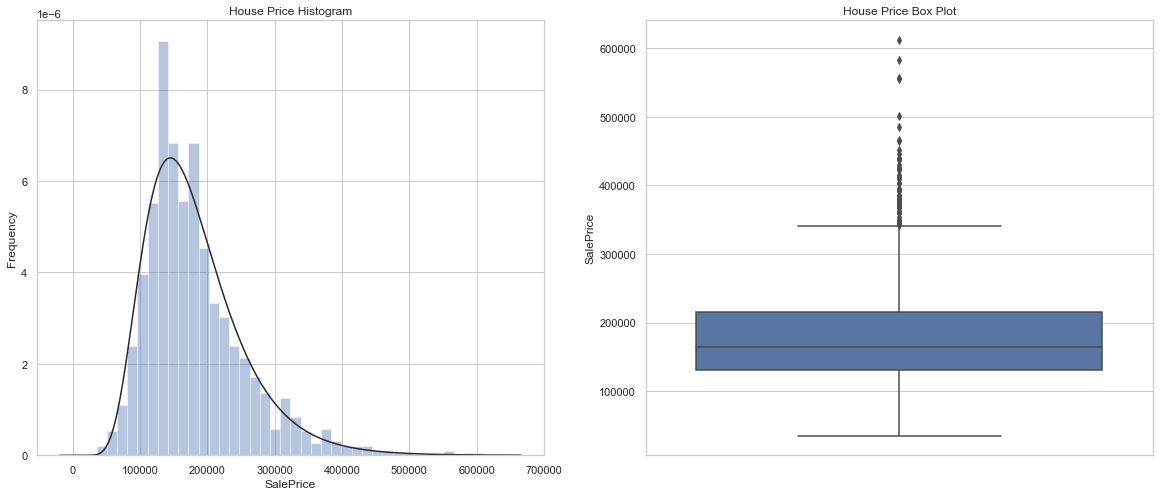

In [45]:
# Initializing a figure
plt.figure(figsize = (20, 8))

# Inititalizing a subplot
plt.subplot(1,2,1)
# Setting the title pf the plot
plt.title('House Price Histogram')
# Plotting a Histogram for the Price column
sns.distplot(df_train.SalePrice, kde = False, fit = stats.lognorm)
plt.ylabel('Frequency')

# Initializing another subplot
plt.subplot(1,2,2)
# Setting title of the plot
plt.title('House Price Box Plot')
# Plotting a boxplot for price column
sns.boxplot( y = df_train.SalePrice)
plt.show()

In [46]:
# Checking the various percentile values for the Price column
print(df_train.SalePrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85, 0.90, 1]))

count      1266.000000
mean     181610.662717
std       75827.202320
min       35311.000000
25%      131000.000000
50%      165000.000000
75%      215000.000000
85%      252169.500000
90%      280000.000000
100%     611657.000000
max      611657.000000
Name: SalePrice, dtype: float64


In [47]:
# Skewness
print('Skewness: ' + str(df_train['SalePrice'].skew()) )

Skewness: 1.4605471816764524


**Inference:**
    
   1. The house price looks to be `right skewed` as mojority of the house prices are `low` (below 250,000).
   2. There is a significant difference between the `mean` and the `median` of the price distribution.
   3. `Large Standard Deviation` indicates `high variance` in the house price (85% of the prices are below 250,000. Whereas the remaining 15% are between 250,000 and 755,000)

**`Note: `** There are some outliers in the Price as well but we will not remove them for now. Also the large variable is highly skewed. We will treat this later on.

**3.1.2. Visualising Numeric Variables**

For Visualization, we will 1st find all the nueric columns and then make `scatterplots` for all of them.

In [48]:
# Finding all the numerical columns in the dataset.
numCols = df_train.select_dtypes(include = ['int64', 'float'])

#Sorting the columns
numCols = numCols[sorted(numCols.columns)]

# Printing the columns
print(numCols.columns)
print('Numerical Features: ' + str(len(numCols.columns)))

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')
Numerical Features: 37


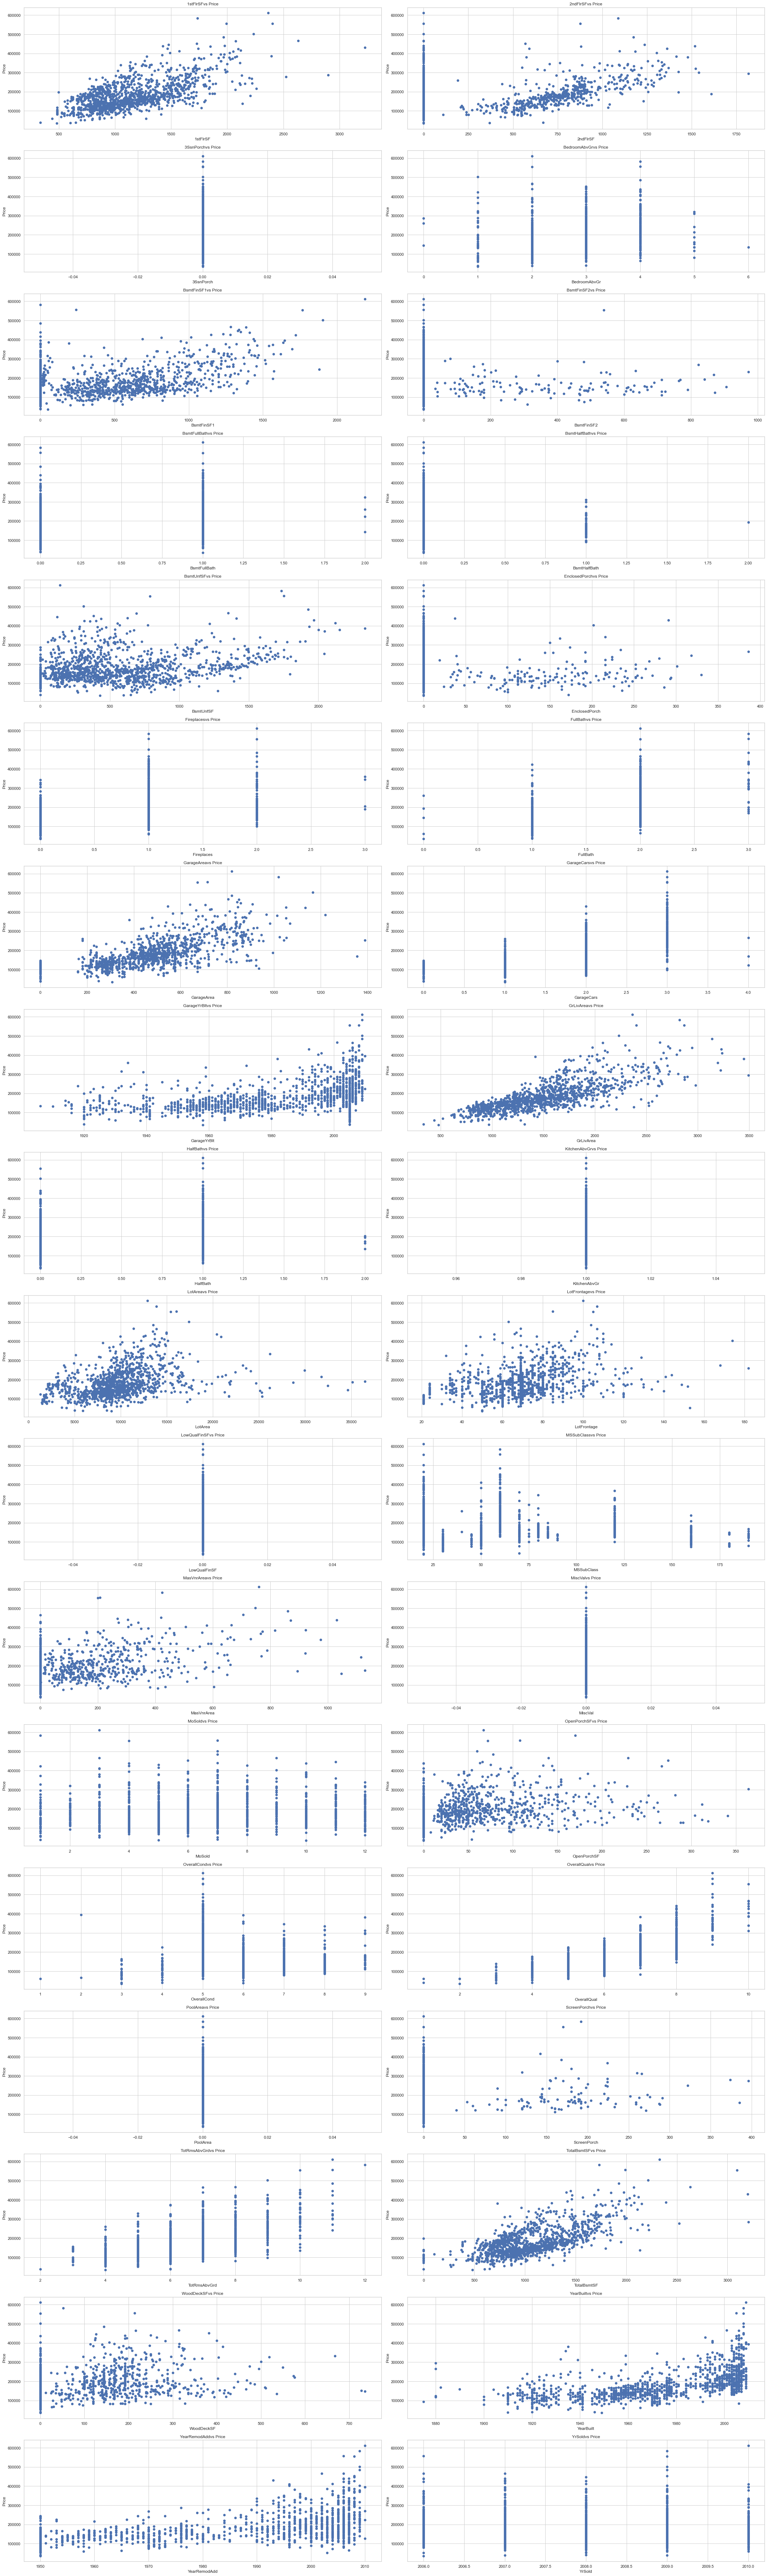

In [49]:
# Initializing a figure
plt.figure(figsize=(30,200))

# Dropping the price column from the plot since we don't need to plot a scatter plot for price
numCols = numCols.drop('SalePrice', axis = 1)

# Running a for loop to print the scatter plots for all numerical columns
for i in range(len(numCols.columns)):
    # Creating a subplot
    plt.subplot(len(numCols.columns), 2, i+1)
    # Creating a scatter plot
    plt.scatter(df_train[numCols.columns[i]], df_train['SalePrice'])
    # Assigning a title to the plot 
    plt.title(numCols.columns[i] + 'vs Price')
    # Setting y label
    plt.ylabel('Price')
    # Setting x label
    plt.xlabel(numCols.columns[i])
    
# Printing all the plots
plt.tight_layout()

**Inference:**
    
   - `1stFlrSF, 2ndFlrSF, GarageArea, GrLivArea, GarageYrBlt, LotFrontage, LotArea, OverallQuall, TotalBsmtSF, WoodDeckSF` seem to be positively correlated to price.
   - Majority of the values in `3SsnPorch, LowQualFinSF, MiscVal, PoolArea, ScreenPorch` are 0 hence we can take a call to delete these columns if the colums are heavily skewed.
   - `BedroomAbvGr, MoSold` seems to have less correlation with price.
   - `BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, Enclosed Porch, HalfBath, Fireplaces, FullBath, GarageCars, MSSubClass, MasVnrArea, OpenPorchSF,OverallCond, TotRmsAbvGrd, YearBuilt, YearRemodAdd, YrSold` seems to have some correlation with price.
   - Majority of the values in `kitchenAbvGr` are 1 hence we can take a call to delete this column if the column is heavily skewed.

**3.1.3. Visualising Categorical Variables**

In order to visualize the Categorical Variables, we will make `Histograms & Boxplots`.

In [50]:
# Finding the categorical columns & printing the same.
categCols = df_train.select_dtypes(exclude=['int64', 'float64'])
# Sorting the columns
categCols = categCols[sorted(categCols.columns)]
# Printing the columns
print(categCols.columns)

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')


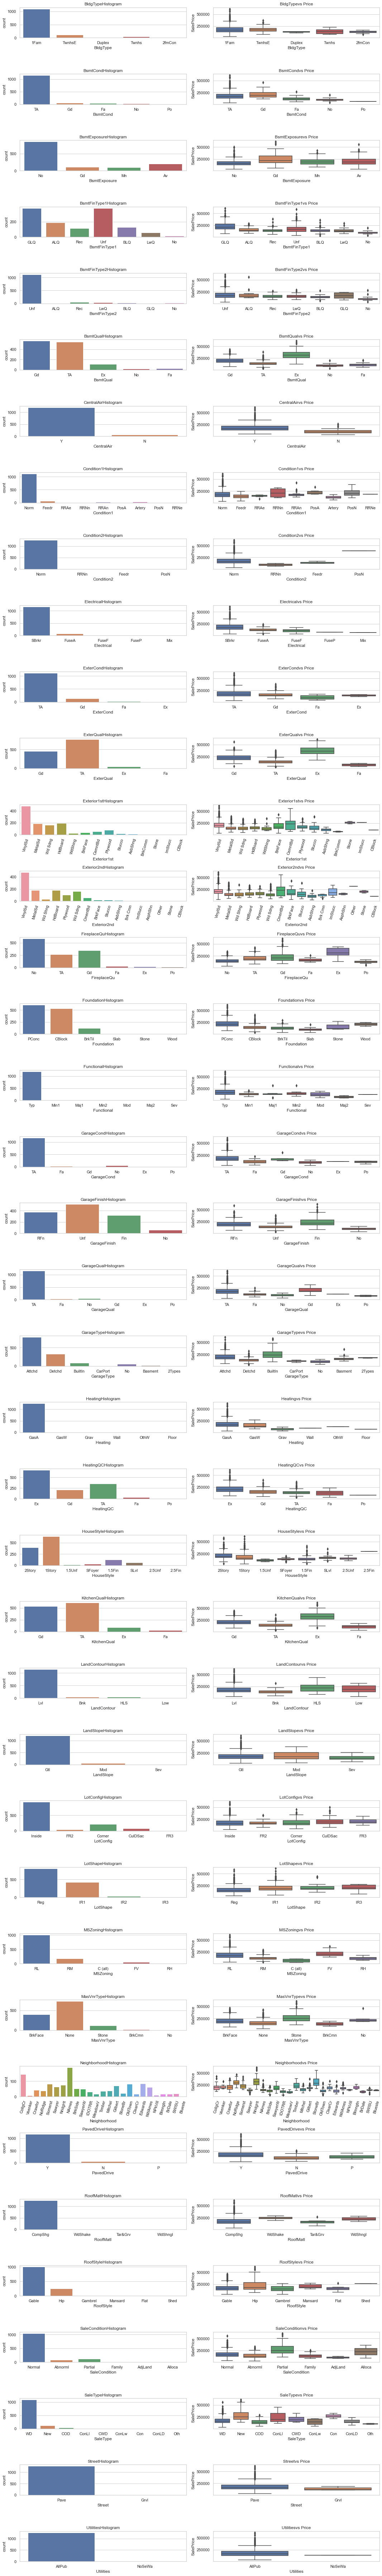

In [51]:
# Initializing a figure
plt.figure(figsize = (15,100))

#Initializing a variable for plotting multiple subplots
n = 0

#Running a for loop to print the histogram and boxplots for all categorical columns
for i in range(len(categCols.columns)):
    # Increasing the count of the variable m
    n+=1
    # Creating 1st subplot
    plt.subplot(len(categCols.columns), 2, n)
    #Creating Histogram as the 1st plot for the column
    sns.countplot(df_train[categCols.columns[i]])
    # assigning x label rotation for carName column for proper visibility
    if categCols.columns[i] == 'Exterior1st' or categCols.columns[i] == 'Exterior2nd' or categCols.columns[i] == 'Neighborhood':
        plt.xticks(rotation = 75)
    else:
        plt.xticks(rotation = 0)
    # Assigning a title to the plot
    plt.title(categCols.columns[i] + 'Histogram')
    
    # Increasing the count of the variable n to plot the box plot for the same column
    n+=1
    
    #Creating 2nd subplot
    plt.subplot(len(categCols.columns), 2, n)
    # Creating a Boxplot as the 2nd plot of the column
    sns.boxplot(x = df_train[categCols.columns[i]], y = df_train1.SalePrice)
    # Assigning a title to the plot
    plt.title(categCols.columns[i] + 'vs Price')
    # Assigning x label rotation for carName column for proper visibility
    if categCols.columns[i] == 'Exterior1st' or categCols.columns[i] == 'Exterior2nd' or categCols.columns[i] == 'Neighborhood':
        plt.xticks(rotation = 75)
    else:
        plt.xticks(rotation = 0)
        
# Printing all the plots
plt.tight_layout()

**Inference:**
- Majority of the values in BlgType are 1Fam i.e single-family Detached.
- Majority of the values in BsmtCond are TA i.e typical condition.
- Majority of the values in BsmtExposure are No i.e No Exposure.
- Majority of the values in BsmtFinType1 are GLQ(Good Living Quarters) and Unf(Unfinished). The GLQ are highly priced as compared to other Ratings.
- Majority of the values in BsmtFinType2 are Unf which means that the second basement is mostly unfinished. The ALQ rating basement has the highest quantile range.
- Majority of the values in BsmtQual are Gd and TA which means that the average height of the basement is above 80 inches. Ex(Excellent) has the highest price range.
- Majority of the houses have Central air conditioning and hence have the highest price range as well.
- Condition1 and Condition2 of the houses in majority are Normal. Artery has a good price range as compared to others except Normal condition.
- Majority of the houses have SBrkr Electrical system.
- Majority of the external conditions of the materials are Average/Typical. These and Good external conditioms have the highest price ranges.
- The external quality of the materials on an average is Typical. Good and Excellent condition have the highest price ranges which is as expected.
- Exterior covering on majority of the houses are Vinyl Siding followed by Metal Siding and Hard Board. Hard Board and Vinyl Siding have the highest prices.
- Majority of the houses have No Fireplace. If they have then they are in Good and Typical condition and hence these houses attract more prices.
- The type of foundation is more of Poured Concrete and Cinder Block. Poured Concrete have the highest price range.
- The home functionality, Garage Condition, GarageQual is typical in majority of cases. We can think of deleting these columns if they are heavily skewed.
- The Garage Finish is majorly Unfinished but furnished garages have a higher price.
- Majority of GarageType are attached to the home and attract the highest house price as well.
- Majority of the houses are Gas forced war furnace heated. We can think of deleting this column if it is heavily skewed.
- Majority of the houses have Excellent Heating quality and hence have the highest price range.
- Majority of the houses are 1 story tall followed by 2 stories. 2 stories houses are most priced followed by 1 story house.
- Majority of houses have typical Kitchen quality but the excellent quality attract the highest prices.
- Majority of the houses are on a leveled or flat land and have a Gentle slope. We can think of deleting this columns if it is heavily skewed.
- Majority of the houses have an inside lot and are regular in shape. We can think of deleting this columns if it is heavily skewed.
- Majority of the houses are from Residential Low Density zone and these attract the highest prices as well.
- Majority of the houses have been bought in North Ames area followed by College Creek. Northridge and Northridge Heights neighbourhood have the highest price ranges.
- Majority of the houses do not have Masonry veneer done and the ones which have it's Brick Common. These 2 have the highest price range as well.
- Majority of the houses have a Paved Driveway and a Paved Street. We can think of deleting this columns if it is heavily skewed.
- Majority of the houses have the Roof Material as Standard Shingle and the type as Gable. We can think of deleting this columns if it is heavily skewed.
- Majority of the houses has had a Normal with Warranty Deed - Conventional Sale. We can think of deleting this columns if it is heavily skewed.
- Majority of the houses have All public utilities available (E,G,W & S). We can think of deleting this columns if it is heavily skewed.

**Conclusion:**

Based on the EDA, we can easily drop some columns which are highly skewed since they will not help us in our model building.    

In [52]:
# Pulling all the columns which can be deleted based on Skewness
cols_to_drop = ['Utilities', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch', 'KitchenAbvGr', 'GarageQual', 
               'GarageCond', 'Functional', 'Heating', 'LandContour', 'LandSlope', 'LotConfig', 'MSZoning', 'PavedDrive',
               'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']

#Running the loop to print the value counts
for i in cols_to_drop:
    print(df_train[i].value_counts(normalize=True)*100)

AllPub    99.921011
NoSeWa     0.078989
Name: Utilities, dtype: float64
0    100.0
Name: 3SsnPorch, dtype: float64
0    100.0
Name: LowQualFinSF, dtype: float64
0    100.0
Name: MiscVal, dtype: float64
0    100.0
Name: PoolArea, dtype: float64
0      91.864139
192     0.473934
224     0.394945
189     0.315956
120     0.315956
         ...    
122     0.078989
95      0.078989
260     0.078989
385     0.078989
40      0.078989
Name: ScreenPorch, Length: 68, dtype: float64
1    100.0
Name: KitchenAbvGr, dtype: float64
TA    91.785150
No     4.344392
Fa     2.922591
Gd     0.710900
Po     0.157978
Ex     0.078989
Name: GarageQual, dtype: float64
TA    92.417062
No     4.344392
Fa     2.211690
Gd     0.552923
Po     0.394945
Ex     0.078989
Name: GarageCond, dtype: float64
Typ     94.154818
Min2     2.211690
Min1     1.816746
Maj1     0.868878
Mod      0.552923
Maj2     0.315956
Sev      0.078989
Name: Functional, dtype: float64
GasA     98.104265
GasW      1.105845
Grav      0.552923
Wal

Looking at the distribution of the values in the above mentioned columns, we have taken a decision of `deleting all these columns which have single value of >80%` since they will not  help in our model building.

In [53]:
# Dropping the Columns
df_train = df_train.drop(['Utilities', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch', 'KitchenAbvGr', 
                          'GarageQual', 'GarageCond', 'Functional', 'Heating', 'LandContour', 'MSZoning', 'PavedDrive', 
                          'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'BedroomAbvGr', 'MoSold'], axis = 1)

In [54]:
# Checking the shape of the DataFrame now
df_train.shape

(1266, 56)

**Let's check the correlation coefficients to see which variables are highly correlated**

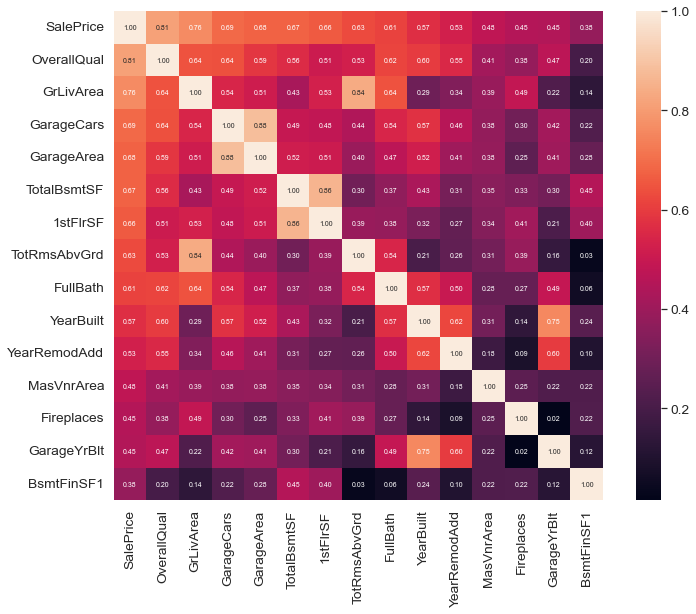

In [55]:
# Saleprice correlation matrix
corr_num = 15 #Number of variables for heatmap
corrmat = df_train.corr()
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(df_train[cols_corr].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize = (12, 9))
hm = sns.heatmap(corr_mat_sales, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 7},
                yticklabels=cols_corr.values, xticklabels = cols_corr.values)
plt.show()

**Inference:**
   - We can see that OverAllQual, GrLivArea and GarageCars are highly correlated with Sales Price.

## 4. Data Preparation

**4.1. Check for Skewness**

First, let's take a look at our target.

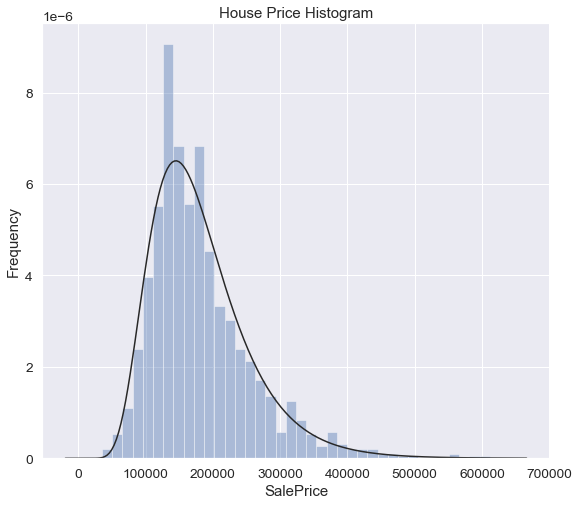

In [56]:
# Initializing a figure
plt.figure(figsize = (20, 8))
# Initializing a subplot
plt.subplot(1,2,1)
# Setting the title of the plot
plt.title('House Price Histogram')
# Plotting a Histogram for price column
sns.distplot(df_train.SalePrice, kde = False, fit = stats.lognorm)
plt.ylabel('Frequency')
plt.show()

- Since the data is skewed, we will try to fix this with `log transformation`.

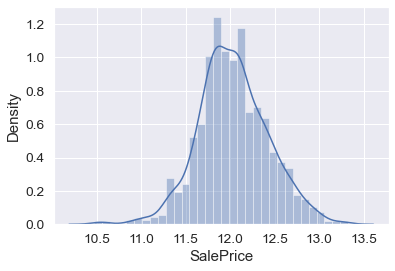

In [57]:
# Checking if the log transformation normalizes the target variable
sns.distplot(np.log(df_train['SalePrice']))
plt.show()

**Inference:**

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [58]:
#Applying the log transformation to the target variable
df_train['SalePrice'] = np.log(df_train['SalePrice'])

Now let's check the skewness for all columns

In [59]:
# Importing the skew library to check skewness
from scipy.stats import skew

In [60]:
#Pulling the numeric columns from the dataset
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending = False)

skewed_feats

BsmtHalfBath     4.155244
BsmtFinSF2       3.854645
EnclosedPorch    2.942728
MasVnrArea       2.287231
OpenPorchSF      1.780696
MSSubClass       1.431412
LotArea          1.423113
WoodDeckSF       1.379024
1stFlrSF         0.956145
BsmtUnfSF        0.944176
2ndFlrSF         0.778564
OverallCond      0.778396
GrLivArea        0.766671
TotalBsmtSF      0.736897
BsmtFinSF1       0.717664
LotFrontage      0.638606
Fireplaces       0.595320
HalfBath         0.533211
TotRmsAbvGrd     0.481451
BsmtFullBath     0.399029
GarageArea       0.228845
OverallQual      0.133832
YrSold           0.102342
FullBath         0.080006
SalePrice        0.036354
GarageCars      -0.274271
YearRemodAdd    -0.575545
YearBuilt       -0.630058
GarageYrBlt     -0.710053
dtype: float64

**Inference:**

We can see that there are columns which have skewness in them but we will leave these for now.

**4.2. Feature Engineering**

Now looking at the data dictionary, we can see that there are some columns which can be merged to create new features.
Let's do that now

In [61]:
#Let's combine the floors square feet and the basement square feet to create the total sq feet
df_train['Total_sq_feet'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['1stFlrSF'] + df_train['2ndFlrSF'])

# Let's combine all the bathrooms square feet to create the total bathroom sq feet
df_train['Total_Bathroom_sq_feet'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) + 
                                      df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))

# Let's combine all the porch square feet to create the total porch sq feet
df_train['Total_porch_sq_feet'] = (df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['WoodDeckSF'])

In [62]:
# Checking the shape of DataFrame now
df_train.shape

(1266, 59)

In [63]:
# Let's drop the columns which we used to create new features
df_train = df_train.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath',
                          'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch', 'WoodDeckSF'], axis = 1)

In [64]:
# Checking the DataFrame now
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,YrSold,SalePrice,Total_sq_feet,Total_Bathroom_sq_feet,Total_porch_sq_feet
0,60,65.0,8450,Reg,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,Ex,Y,SBrkr,1710,Gd,8,0,No,Attchd,2003.0,RFn,2,548,2008,12.247694,2416,3.5,61
1,20,80.0,9600,Reg,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,Ex,Y,SBrkr,1262,TA,6,1,TA,Attchd,1976.0,RFn,2,460,2007,12.109011,2240,2.5,298
2,60,68.0,11250,IR1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,Ex,Y,SBrkr,1786,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,2008,12.317167,2272,3.5,42
3,70,60.0,9550,IR1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,Gd,Y,SBrkr,1717,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,2006,11.849398,1933,2.0,307
4,60,84.0,14260,IR1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,Ex,Y,SBrkr,2198,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,2008,12.429216,2853,3.5,276


In [65]:
# Checking the shape of DataFrame now
df_train.shape

(1266, 48)

Now we can also see that there are 4 `YEAR columns` in the dataset. In order to handle them we will convert them as well by finding the number of years.

In [66]:
# Puling the list of all the year columns from the dataset 
Year_cols = df_train.filter(regex = 'Yr|Year').columns
# Running a for loop to find the max year of each column
for i in Year_cols:
    i = df_train[i].max()
    print(i)

2010
2010
2010.0
2010


Since the max values for all the year columns are the same, we will now convert the year columns by `subtracting the max year date with all the values in the 4 columns`.

In [67]:
# Running a for loop to subtract the max year with all values
for i in Year_cols:
    df_train[i] = df_train[i].apply(lambda x: 2010 - x)

In [68]:
# Checking the dataset now
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,YrSold,SalePrice,Total_sq_feet,Total_Bathroom_sq_feet,Total_porch_sq_feet
0,60,65.0,8450,Reg,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,7,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,Ex,Y,SBrkr,1710,Gd,8,0,No,Attchd,7.0,RFn,2,548,2,12.247694,2416,3.5,61
1,20,80.0,9600,Reg,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,34,34,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,Ex,Y,SBrkr,1262,TA,6,1,TA,Attchd,34.0,RFn,2,460,3,12.109011,2240,2.5,298
2,60,68.0,11250,IR1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,9,8,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,Ex,Y,SBrkr,1786,Gd,6,1,TA,Attchd,9.0,RFn,2,608,2,12.317167,2272,3.5,42
3,70,60.0,9550,IR1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,95,40,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,Gd,Y,SBrkr,1717,Gd,7,1,Gd,Detchd,12.0,Unf,3,642,4,11.849398,1933,2.0,307
4,60,84.0,14260,IR1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,10,10,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,Ex,Y,SBrkr,2198,Gd,9,1,TA,Attchd,10.0,RFn,3,836,2,12.429216,2853,3.5,276


In [69]:
df_train.shape

(1266, 48)

**4.3. Creating Dummies**

We will now create dummy variables for all the categorical variables in order to convert them to numerical so that the model could be built for the same.

In [70]:
# Pulling all the categorical columns from the dataset.
categCols = df_train.select_dtypes(exclude = ['int64', 'float64'])
# Sorting the columns
categCols = categCols[sorted(categCols.columns)]
# Printing the categorical columns
print(categCols.columns)

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandSlope', 'LotConfig', 'LotShape', 'MasVnrType',
       'Neighborhood', 'RoofMatl'],
      dtype='object')


In [71]:
# Defining the map function
def dummies(x, df): 
    # Get the dummy variables for the categorical feature and store it in a new variable - 'dummy'
    dummy = pd.get_dummies(df[x], drop_first=True)
    for i in dummy.columns:
        dummy = dummy.rename(columns={i: x+'_'+i})
    # Add the results to the original dataframe
    df = pd.concat([df, dummy], axis = 1)
    # Drop the original category variables as dummy are already created
    df.drop([x], axis = 1, inplace = True)
    # Return the df
    return df

#Applying the function to the df_train categorical columns
for i in categCols:
    df_train = dummies(i, df_train)

In [72]:
# Checking the dataset now
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice,Total_sq_feet,Total_Bathroom_sq_feet,Total_porch_sq_feet,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,60,65.0,8450,7,5,7,7,196.0,150,856,1710,8,0,7.0,2,548,2,12.247694,2416,3.5,61,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,34,34,0.0,284,1262,1262,6,1,34.0,2,460,3,12.109011,2240,2.5,298,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250,7,5,9,8,162.0,434,920,1786,6,1,9.0,2,608,2,12.317167,2272,3.5,42,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,95,40,0.0,5

As we can see all the categorical values have been expanded and represented as 0's & 1's. This step is crucial to build a robust linear regression model.

In [73]:
# Checkinh the shape of the new dataset which will be used for model building
df_train.shape

(1266, 171)

## 5. Model Building

**5.1. Rescalling the Features**

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to other coefficients.

Now, there are two common ways of rescaling:
   1. Min-Max Scaling
   2. Standardisation(mean-0, sigma-1)
   
We will use `Standardization Scaling`. In this, for all the columns the mean will be 0.

In [74]:
#Importing the libraries
from sklearn.preprocessing import StandardScaler
# Dropping the target variable and storing the remaining in a new DataFrame
X = df_train.drop(['SalePrice'], axis = 1)
# Storing the target column in a new DataFrame
y = df_train['SalePrice']
# Initializing the Standard Scaler
scaler = StandardScaler()
# Scale the X df
scaler.fit(X)

StandardScaler()

**5.2 Remove Multicolinearity**

We will do this by checking VIF and removing all the highly correlated columns since they would be redundent in our model.

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif.loc[vif['VIF'] > 3000, :]

,Features,VIF
85,Exterior2nd_CBlock,inf
8,BsmtUnfSF,inf
45,BsmtQual_No,inf
17,Total_sq_feet,inf
71,Exterior1st_CBlock,inf
25,BsmtCond_No,inf
9,TotalBsmtSF,inf
10,GrLivArea,inf
107,GarageFinish_No,inf
115,GarageType_No,inf


**Inference:**
    
Dropping the columns which have inf VIF value.

In [76]:
# Dropping the above columns
X = X.drop(['Exterior2nd_CBlock', 'BsmtUnfSF', 'BsmtQual_No', 'Total_sq_feet', 'Exterior1st_CBlock', 'BsmtCond_No',
           'TotalBsmtSF', 'GrLivArea', 'GarageFinish_No', 'GarageType_No', 'BsmtFinType1_No'], axis = 1)

Let's check the VIF values again

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif.loc[vif['VIF'] > 100, :]

,Features,VIF
58,ExterCond_TA,425.30
49,Condition2_Norm,390.27
71,Exterior1st_VinylSd,309.35
85,Exterior2nd_VinylSd,290.60
67,Exterior1st_MetalSd,124.63
80,Exterior2nd_MetalSd,116.50
65,Exterior1st_HdBoard,109.33


**Inference:**

Dropping the columns which have VIF value > 100

In [78]:
X = X.drop(['ExterCond_TA', 'Condition2_Norm', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
           'Exterior1st_MetalSd', 'Exterior2nd_MetalSd', 'Exterior1st_HdBoard'], axis = 1)

Let's check VIF values again

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,OverallQual,95.08
0,MSSubClass,94.30
36,BsmtFinType2_Unf,81.01
4,OverallCond,62.89
123,MasVnrType_None,62.34
...,...,...
89,Foundation_Stone,1.18
50,Condition2_RRNn,1.17
69,Exterior2nd_AsphShn,1.10
47,Condition1_RRNe,1.09


**5.3. Splitting the Data into Training and Testing Datasets**

We now need to split our variable into training and testing sets. We'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in the train dataset and the rest 30% in the test dataset which is what we will follow as well.

In [80]:
# Importing the required libraries
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [81]:
# Checking the number of columns and rows in the train dataset
X_train.shape

(886, 152)

In [82]:
# Checking the number of columns and rows in the test dataset
X_test.shape

(380, 152)

**Model 1:**

Let's first run linear regression on the dataset and check what kind of results we get.

In [83]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict
y_train_pred = lm.predict(X_train)

print('RMSE Train {}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('R2 Score Train {}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = lm.predict(X_test)

print('RMSE Test {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R2 Score Test {}'.format(r2_score(y_test, y_test_pred)))

RMSE Train 0.10528158595044429
R2 Score Train 0.92679697986667
RMSE Test 0.14035019355893685
R2 Score Test 0.8762569148616146


**Inference:**
    
As we can see from the above our `train R2 score is 92.67 and test R2 score is 87.62`.

Let's check the different features and their respective coefficients value.

In [84]:
# Model coefficients
# Linear regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, 'constant')
list(zip(cols, model_parameters))

[('constant', 10.648),
 ('MSSubClass', -0.001),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.065),
 ('OverallCond', 0.034),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('TotRmsAbvGrd', 0.042),
 ('Fireplaces', 0.043),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.013),
 ('GarageArea', 0.0),
 ('YrSold', 0.007),
 ('Total_Bathroom_sq_feet', 0.061),
 ('Total_porch_sq_feet', 0.0),
 ('BldgType_2fmCon', 0.069),
 ('BldgType_Duplex', -0.016),
 ('BldgType_Twnhs', -0.004),
 ('BldgType_TwnhsE', 0.037),
 ('BsmtCond_Gd', 0.022),
 ('BsmtCond_Po', -0.0),
 ('BsmtCond_TA', 0.038),
 ('BsmtExposure_Gd', 0.051),
 ('BsmtExposure_Mn', -0.021),
 ('BsmtExposure_No', -0.017),
 ('BsmtFinType1_BLQ', -0.009),
 ('BsmtFinType1_GLQ', -0.004),
 ('BsmtFinType1_LwQ', 0.01),
 ('BsmtFinType1_Rec', 0.012),
 ('BsmtFinType1_Unf', -0.042),
 ('BsmtFinType2_BLQ', 0.025),
 ('BsmtFinType2_GLQ', 0.07),
 ('BsmtFinType2_LwQ', 0.039),
 ('BsmtFinType2_No', -0.095),
 ('BsmtFinType2_Rec', 0.044)

## 6. Ridge and Lasso Regression

Since we have multiple features and a big difference between the R2 score of Train and Test set, we will try to make this better by performing Advanced Regression Techniques.

The 2 that we will use here are:
   - Ridge Regression
   - Lasso Regression

**6.1. Ridge Regression**

In [85]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Initializing the Ridge Regression
ridge = Ridge()

# Cross Validation
# Setting the number of folds
folds = 5
# Performing GridSearchCV on the ridge regression using the list of params
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose=1)
# Fitting the model on your Train sets
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# Storing the results in a new df
cv_results = pd.DataFrame(model_cv.cv_results_)
# Filtering out the alpha parameters which are less than 200
cv_results = cv_results[cv_results['param_alpha']<=200]
# Checking the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004401,0.001357,0.002201,3.998281e-04,0.0001,{'alpha': 0.0001},-0.104139,-0.103616,-0.099068,-0.106082,-0.094247,-0.101430,0.004264,26,-0.074300,-0.075503,-0.076834,-0.075421,-0.077700,-0.075952,0.001187
1,0.003601,0.000490,0.001800,4.000903e-04,0.001,{'alpha': 0.001},-0.104127,-0.103593,-0.099053,-0.106072,-0.094244,-0.101418,0.004261,25,-0.074301,-0.075506,-0.076836,-0.075422,-0.077700,-0.075953,0.001187
2,0.003801,0.000400,0.002000,6.743496e-07,0.01,{'alpha': 0.01},-0.104007,-0.103373,-0.098913,-0.105974,-0.094210,-0.101295,0.004229,24,-0.074311,-0.075530,-0.076852,-0.075437,-0.077708,-0.075968,0.001186
3,0.004601,0.000490,0.002401,4.906026e-04,0.05,{'alpha': 0.05},-0.103583,-0.102502,-0.098320,-0.105686,-0.094067,-0.100832,0.004147,23,-0.074360,-0.075640,-0.076921,-0.075498,-0.077753,-0.076034,0.001182
4,0.004601,0.000800,0.003200,9.806205e-04,0.1,{'alpha': 0.1},-0.103175,-0.101589,-0.097639,-0.105375,-0.093912,-0.100338,0.004088,22,-0.074430,-0.075765,-0.077006,-0.075565,-0.077801,-0.076113,0.001175


Let's plot the above values so that we can better visualize the results

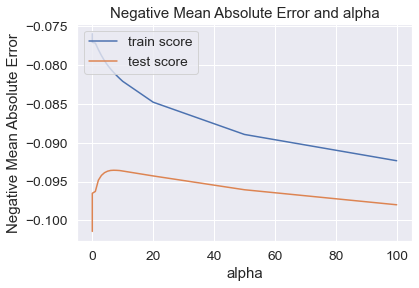

In [87]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting 
# Plotting the mean train scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# Plotting the mean test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# Setting x label
plt.xlabel('alpha')
# Setting y label
plt.ylabel('Negative Mean Absolute Error')
# Setting the Title
plt.title('Negative Mean Absolute Error and alpha')
# Setting the legend
plt.legend(['train score', 'test score'], loc = 'upper left')
plt.show()

In [88]:
# Finding the best Alpha value
print('The best value of Alpha for Ridge Regression is: ', model_cv.best_params_)

The best value of Alpha for Ridge Regression is:  {'alpha': 7.0}


**Hyperparameter Tuning**

Since we now know that the best Alpha(Regularization term) value is 7, we will now build our model with the same.

In [89]:
# Setting the value of alpha as 7
alpha = 7
# Initializing the ridge regression with the optimized alpha value 
ridge = Ridge(alpha = alpha)

# Running the ridge algo on the train datasets
ridge.fit(X_train, y_train)

# Let's predict
y_train_pred = ridge.predict(X_train)
print('RMSE Train {}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('R2 Score Train {}'.format(r2_score(y_train, y_train_pred)))
y_test_pred = ridge.predict(X_test)
print('RMSE Test {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R2 Score Test {}'.format(r2_score(y_test, y_test_pred)))

RMSE Train 0.10981730795053707
R2 Score Train 0.9203536737103156
RMSE Test 0.13366186155982007
R2 Score Test 0.8877697530412173


As we can see from the above, the R2 score of `Train set is 0.92 and Test is 0.88` for Ridge Regression.

In [90]:
# Checking the coefficient values of all the features
ridge.coef_

array([-3.07329417e-04,  5.20826944e-04,  9.04661852e-06,  7.17504330e-02,
        3.63330708e-02, -2.14023013e-03, -1.41434234e-03,  6.73297240e-05,
        4.70753598e-02,  4.45011251e-02,  9.71975717e-04,  1.93137288e-02,
        2.31121858e-04,  6.30168635e-03,  6.06515311e-02,  1.08932580e-04,
        1.97689285e-02, -1.84762300e-03, -2.83235089e-02,  1.64679551e-02,
        1.74212460e-02,  0.00000000e+00,  4.02403297e-02,  4.06800833e-02,
       -7.93053037e-03, -1.22623076e-02,  1.27976906e-03, -1.75317451e-03,
        4.74711271e-03,  1.00306621e-02, -4.05130755e-02,  1.05017153e-02,
        1.33174491e-02,  1.49454894e-02, -4.27332139e-02,  6.70640976e-03,
        2.90496939e-02, -7.46760452e-02, -2.03521826e-02, -3.00267954e-02,
        3.71787644e-02,  2.40624251e-02,  5.09893716e-02,  5.34548785e-03,
        6.08644855e-02, -5.47965411e-02,  4.26516547e-02,  0.00000000e+00,
       -2.00518768e-03, -1.88892214e-02, -2.86371326e-02, -3.22693924e-02,
       -1.70091355e-02,  

In [91]:
# Assigning the columns to the respective coefficient values
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = X.columns
cols = cols.insert(0, 'constant')
list(zip(cols, model_parameters))

[('constant', 10.66),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.072),
 ('OverallCond', 0.036),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('TotRmsAbvGrd', 0.047),
 ('Fireplaces', 0.045),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.019),
 ('GarageArea', 0.0),
 ('YrSold', 0.006),
 ('Total_Bathroom_sq_feet', 0.061),
 ('Total_porch_sq_feet', 0.0),
 ('BldgType_2fmCon', 0.02),
 ('BldgType_Duplex', -0.002),
 ('BldgType_Twnhs', -0.028),
 ('BldgType_TwnhsE', 0.016),
 ('BsmtCond_Gd', 0.017),
 ('BsmtCond_Po', 0.0),
 ('BsmtCond_TA', 0.04),
 ('BsmtExposure_Gd', 0.041),
 ('BsmtExposure_Mn', -0.008),
 ('BsmtExposure_No', -0.012),
 ('BsmtFinType1_BLQ', 0.001),
 ('BsmtFinType1_GLQ', -0.002),
 ('BsmtFinType1_LwQ', 0.005),
 ('BsmtFinType1_Rec', 0.01),
 ('BsmtFinType1_Unf', -0.041),
 ('BsmtFinType2_BLQ', 0.011),
 ('BsmtFinType2_GLQ', 0.013),
 ('BsmtFinType2_LwQ', 0.015),
 ('BsmtFinType2_No', -0.043),
 ('BsmtFinType2_Rec', 0.007),
 (

Let's Plot the above and find the top 10 features of Ridge regression

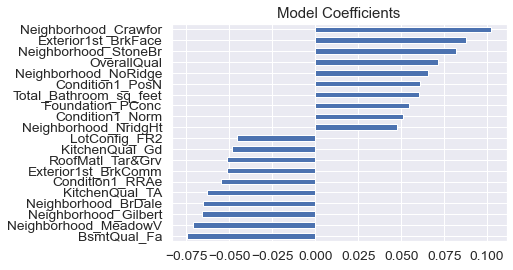

In [92]:
# Pulling the coefficients and index and creating a new df
coef = pd.Series(ridge.coef_, index = X.columns).sort_values()
# Filtering the top 5 positive and negative features
ridge_imp_coef = pd.concat([coef.head(10), coef.tail(10)])
# Plotting the graph
ridge_imp_coef.plot(kind = 'barh')
# Setting the title of the plot
plt.title('Model Coefficients')
plt.show()

In [93]:
# Converting the important feature list into a df for better understanding
ridge_imp_coef = ridge_imp_coef.to_frame('Coeff_val').reset_index()
ridge_imp_coef.columns = ['Features', 'Coeff_val']
ridge_imp_coef['Coeff_val'] = ridge_imp_coef['Coeff_val'].abs()
ridge_imp_coef = ridge_imp_coef.sort_values(by = ['Coeff_val'], ascending = False)
ridge_imp_coef.head(10)

,Features,Coeff_val
19,Neighborhood_Crawfor,0.102481
18,Exterior1st_BrkFace,0.087625
17,Neighborhood_StoneBr,0.082051
0,BsmtQual_Fa,0.074676
16,OverallQual,0.071750
1,Neighborhood_MeadowV,0.071344
2,Neighborhood_Gilbert,0.065978
15,Neighborhood_NoRidge,0.065913
3,Neighborhood_BrDale,0.065585
4,KitchenQual_TA,0.063162


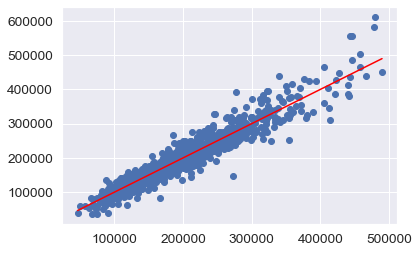

In [94]:
p_pred = np.expm1(ridge.predict(X))
plt.scatter(p_pred, np.expm1(y))
plt.plot([min(p_pred), max(p_pred)], [min(p_pred), max(p_pred)], c = 'red')
plt.show()

**Inference:**
    
As we can see that our predicted line is passing through almost the entire dataset.

**6.2. Lasso Regression**

Now let's run Lasso Regression on the dataset.

In [95]:
# Initializing the Lasso Regression
lasso = Lasso()

# Cross Validation
# Performing GridSearchCV on the lasso regression using the list of params
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose=1)
# Fitting the model on your Train sets
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
# Storing the results in a new df
cv_results = pd.DataFrame(model_cv.cv_results_)

# Checking the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023634,5.314168e-03,0.002108,4.817828e-04,0.0001,{'alpha': 0.0001},-0.099790,-0.096381,-0.092620,-0.102871,-0.091731,-0.096679,0.004221,2,-0.075425,-0.076970,-0.078209,-0.076739,-0.078174,-0.077103,0.001033
1,0.007602,4.904471e-04,0.001800,3.999005e-04,0.001,{'alpha': 0.001},-0.094632,-0.094950,-0.087104,-0.099813,-0.096460,-0.094592,0.004170,1,-0.085733,-0.087551,-0.087683,-0.086228,-0.086651,-0.086769,0.000752
2,0.004400,4.902917e-04,0.002001,8.449576e-07,0.01,{'alpha': 0.01},-0.107724,-0.113674,-0.097805,-0.106158,-0.104597,-0.105992,0.005119,3,-0.103365,-0.101784,-0.104980,-0.103158,-0.103989,-0.103455,0.001049
3,0.004001,6.326359e-04,0.001400,4.899792e-04,0.05,{'alpha': 0.05},-0.128711,-0.123133,-0.116024,-0.114113,-0.117728,-0.119942,0.005316,4,-0.117970,-0.116801,-0.118550,-0.117661,-0.118185,-0.117834,0.000592
4,0.004001,2.611745e-07,0.001600,4.898625e-04,0.1,{'alpha': 0.1},-0.158674,-0.139747,-0.137305,-0.131300,-0.136126,-0.140630,0.009431,5,-0.140176,-0.136995,-0.138077,-0.136256,-0.139080,-0.138117,0.001407


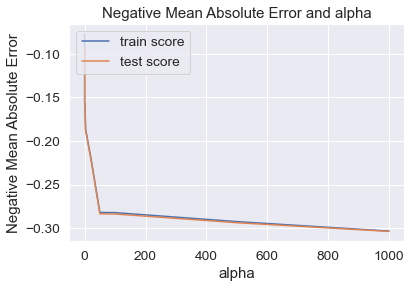

In [97]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting 
# Plotting the mean train scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# Plotting the mean test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# Setting x label
plt.xlabel('alpha')
# Setting y label
plt.ylabel('Negative Mean Absolute Error')
# Setting the Title
plt.title('Negative Mean Absolute Error and alpha')
# Setting the legend
plt.legend(['train score', 'test score'], loc = 'upper left')
plt.show()

Since we are unable to read the above graph properly, we will convert the x-scale into log

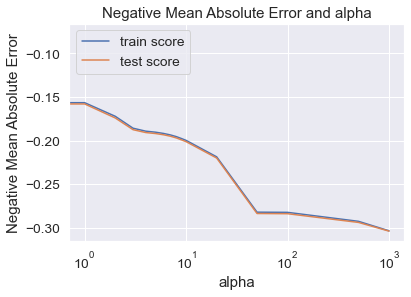

In [98]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
# Plotting the mean train scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# Plotting the mean test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# Setting x label
plt.xlabel('alpha')
# Setting y label
plt.ylabel('Negative Mean Absolute Error')
# Setting the xscale into log
plt.xscale('log')
# Setting the Title
plt.title('Negative Mean Absolute Error and alpha')
# Setting the legend
plt.legend(['train score', 'test score'], loc = 'upper left')
plt.show()

In [99]:
# Finding the best Alpha value
print('The best value of Alpha for Lasso Regression is: ', model_cv.best_params_)

The best value of Alpha for Lasso Regression is:  {'alpha': 0.001}


**Hyperparameter Tuning**

Now we will build our model with the optimized value of alpha for Lasso regression i.e. 0.001

In [100]:
# Initializing the lasso regression with the optimized alpha value 
lm = Lasso(alpha = 0.001)

# Running the lasso algo on the train datasets
lm.fit(X_train, y_train)

# Let's predict
y_train_pred = lm.predict(X_train)
print('RMSE Train {}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('R2 Score Train {}'.format(r2_score(y_train, y_train_pred)))
y_test_pred = ridge.predict(X_test)
print('RMSE Test {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R2 Score Test {}'.format(r2_score(y_test, y_test_pred)))

RMSE Train 0.11814050735346564
R2 Score Train 0.907823157933937
RMSE Test 0.13366186155982007
R2 Score Test 0.8877697530412173


As we can see from the above R2 score of `Train set is 0.90 and Test is 0.88` for Lasso Regression.

In [101]:
# Checking the coefficient values of all the features
lm.coef_

array([-3.11316562e-04,  6.89923532e-04,  9.23354987e-06,  8.12199682e-02,
        3.74933846e-02, -2.35608275e-03, -1.41704979e-03,  8.65883876e-05,
        4.85295037e-02,  4.48742602e-02,  9.07398522e-04,  1.12184275e-02,
        2.64982892e-04,  5.51361370e-03,  6.11520575e-02,  1.24552615e-04,
        0.00000000e+00, -0.00000000e+00, -1.32189043e-02,  1.44180862e-02,
        0.00000000e+00,  0.00000000e+00,  3.25410526e-02,  3.20711847e-02,
        0.00000000e+00, -3.26202263e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.59237064e-03, -3.70432316e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.58788231e-02, -0.00000000e+00,
        1.79340524e-02, -2.74397178e-02, -0.00000000e+00,  0.00000000e+00,
        1.86338997e-02,  0.00000000e+00,  2.41092391e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [102]:
# Assigning the columns to the respective coefficient values
# Lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = X.columns
cols = cols.insert(0, 'constant')
list(zip(cols, model_parameters))

[('constant', 10.588),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.081),
 ('OverallCond', 0.037),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('TotRmsAbvGrd', 0.049),
 ('Fireplaces', 0.045),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.011),
 ('GarageArea', 0.0),
 ('YrSold', 0.006),
 ('Total_Bathroom_sq_feet', 0.061),
 ('Total_porch_sq_feet', 0.0),
 ('BldgType_2fmCon', 0.0),
 ('BldgType_Duplex', -0.0),
 ('BldgType_Twnhs', -0.013),
 ('BldgType_TwnhsE', 0.014),
 ('BsmtCond_Gd', 0.0),
 ('BsmtCond_Po', 0.0),
 ('BsmtCond_TA', 0.033),
 ('BsmtExposure_Gd', 0.032),
 ('BsmtExposure_Mn', 0.0),
 ('BsmtExposure_No', -0.003),
 ('BsmtFinType1_BLQ', 0.0),
 ('BsmtFinType1_GLQ', 0.0),
 ('BsmtFinType1_LwQ', 0.0),
 ('BsmtFinType1_Rec', 0.005),
 ('BsmtFinType1_Unf', -0.037),
 ('BsmtFinType2_BLQ', 0.0),
 ('BsmtFinType2_GLQ', 0.0),
 ('BsmtFinType2_LwQ', 0.0),
 ('BsmtFinType2_No', -0.016),
 ('BsmtFinType2_Rec', -0.0),
 ('BsmtFinType2_Unf',

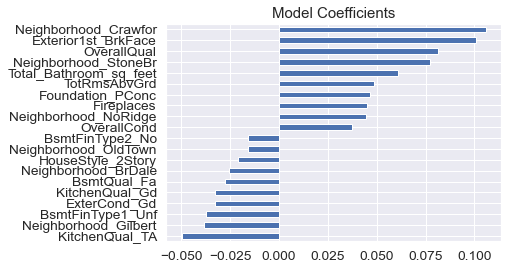

In [103]:
# Pulling the coefficients and index and creating a new df
coef = pd.Series(lm.coef_, index = X.columns).sort_values()
# Filtering the top 5 positive and negative features
lasso_imp_coef = pd.concat([coef.head(10), coef.tail(10)])
# Plotting the graph
lasso_imp_coef.plot(kind = 'barh')
# Setting the title of the plot
plt.title('Model Coefficients')
plt.show()

In [104]:
# Converting the important feature list into a df for better understanding
lasso_imp_coef = lasso_imp_coef.to_frame('Coeff_val').reset_index()
lasso_imp_coef.columns = ['Features', 'Coeff_val']
lasso_imp_coef['Coeff_val'] = lasso_imp_coef['Coeff_val'].abs()
lasso_imp_coef = lasso_imp_coef.sort_values(by = ['Coeff_val'], ascending = False)
lasso_imp_coef.head(10)

,Features,Coeff_val
19,Neighborhood_Crawfor,0.105877
18,Exterior1st_BrkFace,0.100936
17,OverallQual,0.081220
16,Neighborhood_StoneBr,0.077149
15,Total_Bathroom_sq_feet,0.061152
0,KitchenQual_TA,0.049795
14,TotRmsAbvGrd,0.048530
13,Foundation_PConc,0.046723
12,Fireplaces,0.044874
11,Neighborhood_NoRidge,0.044445


Let's visualize the fit after the modelling

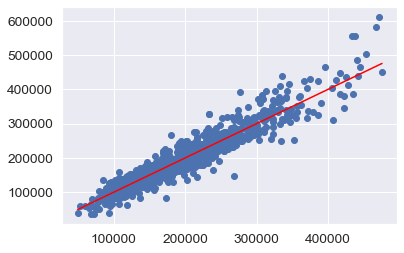

In [105]:
p_pred = np.expm1(lm.predict(X))
plt.scatter(p_pred, np.expm1(y))
plt.plot([min(p_pred), max(p_pred)], [min(p_pred), max(p_pred)], c = 'red')
plt.show()

In [106]:
# Checking how many features were dropped by lasso during modelling
print('Lasso kept', sum(coef!=0), 'important features and dropped the other',
     sum(coef == 0), 'features')

Lasso kept 57 important features and dropped the other 95 features


## 7. Final Conclusion:

Based on our regression results, below are the top 10 features which drive the Sales prices of the House in Australia.
- **Ridge Regression:**
    - We can see that the Train and Test R2 value was `0.92 and 0.88` respectively.
    - The top 10 features that drive the house prices as per Ridge regression are:
        - Neighborhood_Crawfor
        - Exterior1st_BrkFace
        - Neighborhood_StoneBr
        - BsmtQual_Fa
        - OverallQual
        - Neighborhood_MeadowV
        - Neighborhood_Gilbert
        - Neighborhood_NoRidge
        - Neighborhood_BrDale
        - KitchenQual_TA
        
- **Lasso Regression:**
    - We can see that the Train and Test R2 value was `0.90 and 0.88` respectively.
    - The top 10 features that drive the house prices as per Lasso regression are:
        - Neighborhood_Crawfor
        - Exterior1st_BrkFace
        - OverallQual
        - Neighborhood_StoneBr
        - Total_Bathroom_sq_feet
        - KitchenQual_TA
        - TotRmsAbvGrd
        - Foundation_PConc
        - Fireplaces
        - Neighborhood_NoRidge